In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [16]:
log1 = pd.read_csv('../Data/training_logs/model_1.csv')
log2 = pd.read_csv('../Data/training_logs/model_2.csv')
log3 = pd.read_csv('../Data/training_logs/model_3.csv')
log4 = pd.read_csv('../Data/training_logs/model_4.csv')

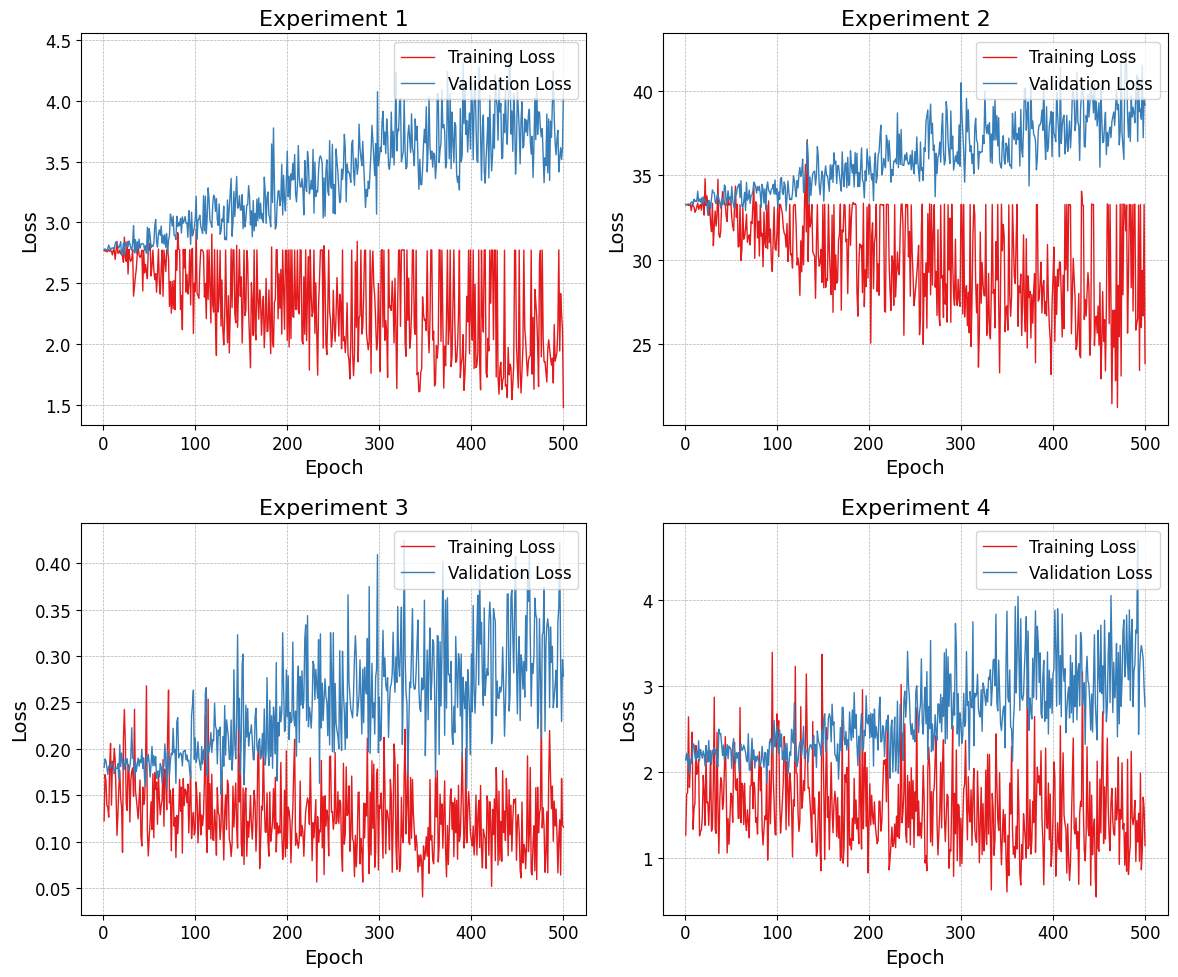

In [64]:
import seaborn as sns
fig = plt.figure(figsize=(12, 10))
gs = GridSpec(2, 2, figure=fig)
sns.set_palette("Set1")

plt.rc('font', size=14)  
plt.rc('axes', titlesize=16) 
plt.rc('axes', labelsize=14) 
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)  
plt.rc('legend', fontsize=12)  

train_color = sns.color_palette("Set1")[0] 
val_color = sns.color_palette("Set1")[1] 

# Subplot 1
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(log1['Epoch'], log1['Train Loss'], label='Training Loss', linewidth=1, color=train_color)
ax1.plot(log1['Epoch'], log1['Validation Loss'], label='Validation Loss', linewidth=1, color=val_color)
ax1.set_title('Experiment 1')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper right')
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

# Subplot 2
ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(log2['Epoch'], log2['Train Loss'], label='Training Loss', linewidth=1)
ax2.plot(log2['Epoch'], log2['Validation Loss'], label='Validation Loss', linewidth=1)
ax2.set_title('Experiment 2')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend(loc='upper right')
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)

# Subplot 3
ax3 = fig.add_subplot(gs[1, 0])
ax3.plot(log3['Epoch'], log3['Train Loss'], label='Training Loss', linewidth=1)
ax3.plot(log3['Epoch'], log3['Validation Loss'], label='Validation Loss', linewidth=1)
ax3.set_title('Experiment 3')
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Loss')
ax3.legend(loc='upper right')
ax3.grid(True, which='both', linestyle='--', linewidth=0.5)

# Subplot 4
ax4 = fig.add_subplot(gs[1, 1])
ax4.plot(log4['Epoch'], log4['Train Loss'], label='Training Loss', linewidth=1)
ax4.plot(log4['Epoch'], log4['Validation Loss'], label='Validation Loss', linewidth=1)
ax4.set_title('Experiment 4')
ax4.set_xlabel('Epoch')
ax4.set_ylabel('Loss')
ax4.legend(loc='upper right')
ax4.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()

plt.savefig('loss.png', dpi=300, bbox_inches='tight')
plt.show()


In [159]:
import numpy as np
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import re
import ast

In [124]:
def process_string(input_str, dim=2):
    input_str = ''.join(input_str.split())
    
    output_str = input_str.replace('][', '],[')
    
    if dim == 2:
        pattern = re.compile(r'(-?\d+(\.\d+)?)(-?\d+(\.\d+)?)')
        output_str = pattern.sub(r'\1,\3', output_str)
    
    else:
        pattern = re.compile(r'(-?\d+(\.\d+)?)(-?\d+(\.\d+)?)(-?\d+(\.\d+)?)')
        output_str = pattern.sub(r'\1,\3,\5', output_str)
    
    return output_str

In [152]:
e12d = '[[ 18.208843     5.9438295 ] [-13.851395    35.07803  ][-11.317861    13.834344  ][ -3.8267696   40.046078  ][-12.075758     0.74811035][-15.532648    46.483128  ][ 30.312775   -37.40388   ][ 37.559513   -29.983128  ][ -0.60644174 -36.891666  ][-18.392374    23.718733  ][  0.5338018   -4.9502096 ][ -5.122384    53.40839   ][ -0.40344715   8.001913  ][ 15.565923    -4.5152845 ][ 12.584599   -43.019386  ][-10.397851   -38.295006  ][ 13.757339    16.403717  ][  2.0260444  -18.887121  ][-23.333204    -3.2196255 ][-20.051523   -35.304817  ][ -4.172866    26.099148  ][-17.060143   -13.645042  ][-20.693445     8.616301  ][ 39.270172   -40.49793   ]]'
e13d = '[[-101.065544   -68.40239    -26.926716 ][  87.417534   -23.793049    -6.700269 ][  20.542618   103.92216      1.9977762][ -59.148872  -101.36802     51.372616 ][ -45.429634    30.869324    56.18507  ][ 118.46254     59.583992    25.576927 ][  66.25769   -107.42958     63.74658  ][-113.88302      3.603472  -109.35183  ][ -17.499418    17.586586   -84.66228  ][  46.86907     40.418774    -8.3014765][-101.866264    81.63267     38.14889  ][ 150.21997     17.399973   -21.32358  ][ -37.180576   112.52701     48.80099  ][ -35.143612   -37.13872    110.67641  ][ -31.237566   -29.551977  -137.46323  ][ -19.485273   -26.182234   -44.43492  ][  73.083664   -13.533129  -106.405594 ][  11.711505   -97.13438    -71.426186 ][ -92.81783     22.66872      0.8315935][  -7.3216352  -41.734066    13.001354 ][  66.48862      3.5992677   53.7983   ][  10.324668    57.261433    88.59884  ][ -29.36802     60.37364     -2.38509  ][  34.083645  -139.06111     23.269785 ]]'
e22d = '[[-40.9192886 -52.8231125][ 75.8839645  17.8098450][-25.3897781 -32.4889603][-12.0459242  12.9305363][-47.6545639 -75.1198273][-29.6031055 -92.2493973][-32.1475410  58.7554359][ 6.74228716  62.4856377][ 36.2842560  29.6412411][ 98.8352356  15.9797106][-21.0175705 -12.1856833][-71.4948959 -26.3230228][-23.4734631  75.5901871][ 14.0257492  43.2722549][ 25.1463985  74.1161270][ 109.247650  36.8659515][-24.3372192 -67.4117126][ 85.5091858 -1.58992159][-62.6350250 -52.6976395][-33.1871796  4.89447117][ 0.0141230505 -8.47923088][-8.56079292  44.3764076][-51.6515121 -23.6553116][ 86.9540253  35.3794708]]'
e23d = '[[ -31.132692   -114.61832       2.5941076 ][  65.99373      13.324461    -36.11473   ][ -38.162693    -58.502953     24.597887  ][ -61.3151        7.6790786   -16.0519    ][ -43.838634    -75.37026     -30.49289   ][  76.214806    -88.10032      17.876507  ][ -33.133286     57.033        75.32129   ][   2.2915356    75.28149     -29.22124   ][ -14.409013     24.232212    -57.24495   ][  97.27524      37.529186    -72.07131   ][ -28.687122    -18.090698     52.75695   ][  21.392073    -47.408085    -18.914606  ][ -22.883059     97.29907      58.534836  ][ -44.01018      69.08492     -22.132416  ][  31.250467     67.80562      25.226395  ][  75.36655      69.392395    -37.74184   ][   0.7909243  -103.61599     -40.25044   ][  65.31509       0.44415498  -83.13134   ][  14.55524     -97.06206      10.730438  ][ -22.105549     -9.714333      3.2323015 ][ -69.796036      4.5456457    37.401276  ][ -23.820972     53.9982       18.88025   ][  20.524357    -44.975872     29.624456  ][ 109.145676     33.355877    -23.658741  ]]'
e32d = '[[ 27.440632     4.307373  ][-34.503937     3.2018406 ][-33.825413    23.106277  ][-18.144125    11.644399  ][ 29.047026   -15.949666  ][-39.369194    13.191546  ][ 39.25752     12.827007  ][ 48.790928    25.164543  ][ 52.826366    11.603426  ][ 63.32777     26.64557   ][ 40.70691    -11.932041  ][ 14.829526    12.80378   ][ 61.842903    13.431259  ][ 39.39878     25.698734  ][ 18.028982    -6.3111963 ][ 28.76998     21.555574  ][ 40.834435    -0.46523112][-22.631983    22.145123  ][ 15.846588   -15.624621  ][-23.693306     1.9436737 ][ 50.500103    -4.2623205 ][  5.144613    12.028538  ][ 31.539576    -5.4836044 ][-28.543556    12.345937  ]]'
e33d = '[[  -2.8881643  -21.816504   -49.75237  ][  19.445559    41.185432    34.782585 ][  83.9949      42.22196     96.568    ][  46.323296    -2.6234522   71.66553  ][ -79.86803     41.979935   -94.03982  ][  87.63675      9.924107    24.277205 ][-104.17214    -74.760666   -24.93562  ][   5.5342646   83.09874    -48.76057  ][ -72.69244     63.614735     9.977268 ][  -1.0671309  -84.43455    107.361115 ][-100.10516    -21.139702   -81.87042  ][  -3.1087723  -91.36043     -8.472124 ][  52.418312    35.56499    -81.57085  ][  82.79299    -91.780045    51.785175 ][ -41.82076    -72.81557    -68.13213  ][  54.04372   -118.231964     0.7346405][ -61.2476      10.431719   -40.120605 ][  37.634937    90.40151     78.97316  ][ -51.44865    -39.97917      9.769885 ][   8.821186    36.60001    104.54254  ][-121.40051      9.459553   -26.26653  ][  22.124878   -48.328556    14.266102 ][ -39.272713    -9.245764  -100.43027  ][  77.76962     70.91465     32.207035 ]]'
e42d = '[[-0.2963413   1.7230277 ][-1.6539986   3.8832846 ][-0.95158607  8.016388  ][-1.4151369   2.2910578 ][-0.637651    7.770889  ][-2.6946516   5.0471663 ][ 0.14934948  7.1865406 ][ 0.5386018  -1.3004299 ][ 1.0084769  -0.07790291][-1.102052    1.7670625 ][ 1.0198823   0.09493068][-1.8176099   3.8813915 ][-1.1598997   6.819267  ][-0.84917796 -0.56706214][-1.2625337   7.000657  ][-2.490016    4.8698263 ][ 0.23365128  8.328859  ][-0.51139724  1.2269843 ][-0.26734185  8.186425  ][-0.83014894  2.6525505 ][ 0.34126207  7.1916633 ][-0.38542476  0.05591042][ 0.09514084 -0.7281374 ][-0.05049055 -1.4404877 ]]'
e43d = '[[  20.817156    25.831856   -81.77872  ][ -68.1643    -108.21851     23.636715 ][ 130.39496     58.283348    98.603004 ][ -81.992966   -18.59088     39.992855 ][-118.49486    -50.189644   -85.62297  ][  62.38363    156.98839    -40.731297 ][  62.552166   -67.74937    -95.74189  ][  27.616432     8.083437    83.11138  ][ -41.751034   120.72317    -38.841328 ][  30.297512    42.025352    -6.5653214][  63.114643   -69.09567    115.923836 ][ 103.54295     76.965836   -75.32155  ][ -35.348824   -54.471596   -54.388367 ][  33.939465   -59.307884    28.129824 ][  86.68377    114.461525    46.272366 ][  -1.5832152 -148.31056    -33.419384 ][-182.92377     16.948423    18.787926 ][ -41.776848    39.967556    -1.9461883][ -36.107918   -64.026726  -143.77711  ][ -92.031364    62.446465    56.711693 ][ -70.940796    20.425558  -117.60781  ][  96.70732    -12.489307    20.297388 ][ -18.868196   -27.85362    134.52985  ][  -5.151945    61.979176   127.43515  ]]'

In [142]:
labels = [
                'classical', "classical",
                'electronic', "electronic",
                'pop', 'pop',
                'country', 'country',
                'guitar', "guitar",
                "drums", "drums",
                'female vocals', "female vocals",
                "piano", "piano",
                "slow", "slow",
                "fast", "fast",
                "ambient", "ambient",
                "quiet", "quiet"   
                ]

In [128]:
def str_to_arr(string, dim):
    string = process_string(string, dim=dim)
    arr = np.array(ast.literal_eval(string))
    return arr

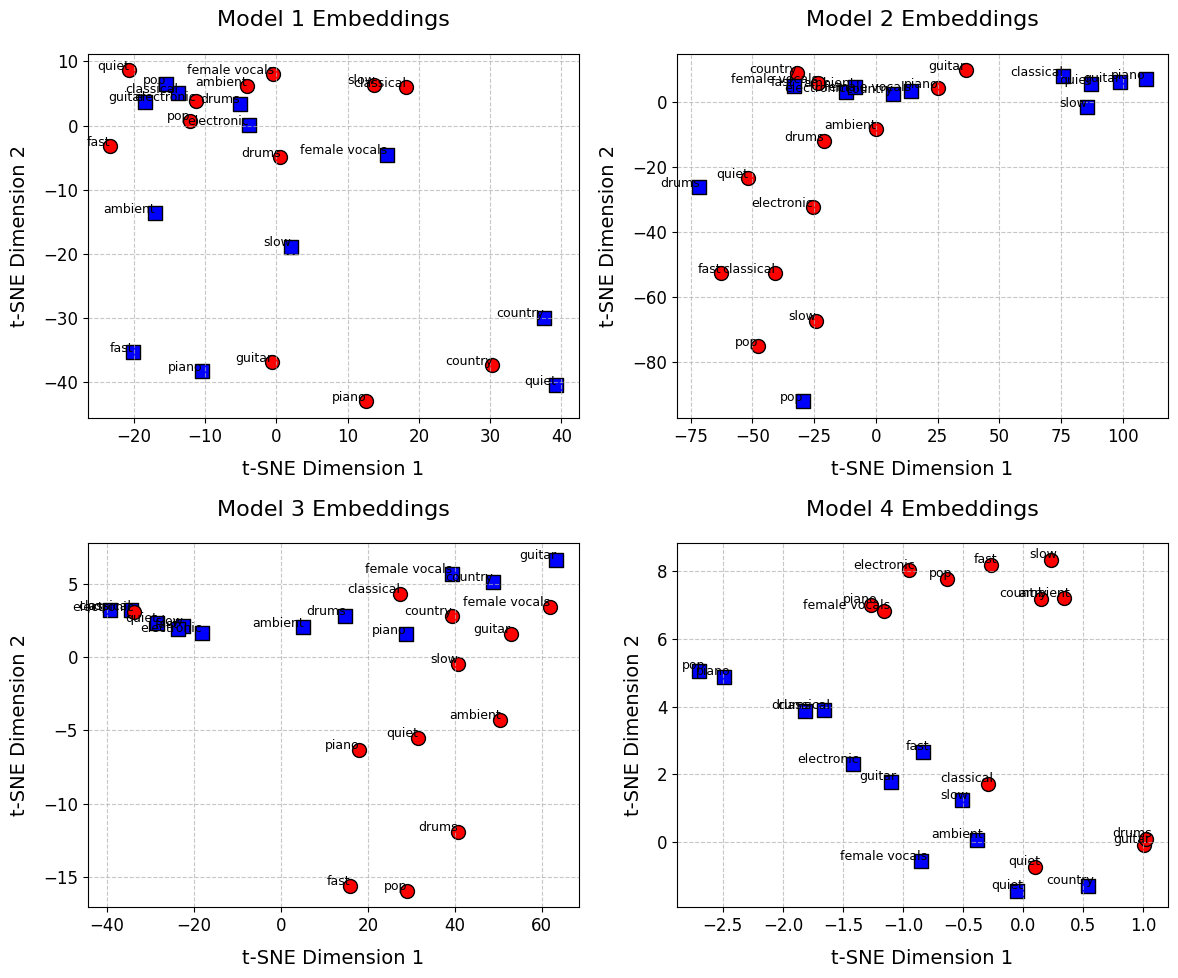

In [158]:
embeds_list = [str_to_arr(e12d, 2), str_to_arr(e22d, 2), str_to_arr(e32d, 2), str_to_arr(e42d, 2)]
titles = ['Model 1 Embeddings', 'Model 2 Embeddings', 'Model 3 Embeddings', 'Model 4 Embeddings']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for idx, (embeds, title) in enumerate(zip(embeds_list, titles)):
    ax = axes[idx // 2, idx % 2] 

    for i in range(0, len(embeds), 2):
        ax.scatter(embeds[i, 0], embeds[i, 1], c='red', label='Original Tag' if i == 0 else "", marker='o', edgecolor='k', s=100)
        ax.scatter(embeds[i+1, 0], embeds[i+1, 1], c='blue', label='Playlist Description' if i == 0 else "", marker='s', edgecolor='k', s=100)


    for i, label in enumerate(labels):
        ax.text(embeds[i, 0] + 0.05, embeds[i, 1] + 0.05, label, fontsize=9, ha='right')

    ax.set_title(title, fontsize=16, pad=20)
    ax.set_xlabel('t-SNE Dimension 1', fontsize=14, labelpad=10)
    ax.set_ylabel('t-SNE Dimension 2', fontsize=14, labelpad=10)

    ax.grid(True, linestyle='--', alpha=0.7)

    ax.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.savefig('tsne.png', dpi=300, bbox_inches='tight')
plt.show()